Accuracy: 1.0

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



c:\Users\rajva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction of New Patient: YES


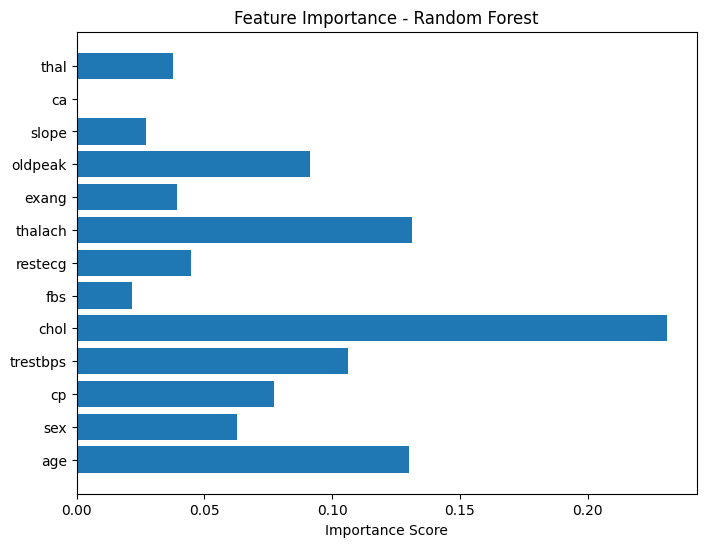

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("heart_sample.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=100,      
    max_depth=200,
    random_state=42
)

rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nReport:\n", classification_report(Y_test, y_pred))

new_patient = [[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]
prediction = rf.predict(new_patient)[0]
result = "YES" if prediction == 1 else "NO"

print("Prediction of New Patient:", result)

importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,6))
plt.barh(features, importance)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()
